In [1]:
from seaborn import load_dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
en=LabelEncoder()

In [4]:
df['species']=en.fit_transform(df['species']) # sklearn can not able to handle categorical labels (data) so we are doing lable encoding

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df=df[['sepal_length','petal_length','species']]

In [7]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [8]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
clf=LogisticRegression(multi_class='multinomial')

In [11]:
clf.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [12]:
y_pred=clf.predict(x_test)

In [13]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [14]:
pd.DataFrame(confusion_matrix(y_test,y_pred)) # minimum 75-85 accuracy of the model 

,0,1,2
0,11,0,0
1,0,13,0
2,0,1,5


In [15]:
# prediction
query=np.array([[5.1,1.4]])
clf.predict_proba(query)

array([[9.70386688e-01, 2.96130629e-02, 2.48923883e-07]])

In [16]:
query2=np.array([[6.7,5.2]])
clf.predict_proba(query2)

array([[1.87002070e-04, 2.49653802e-01, 7.50159196e-01]])

In [17]:
clf.predict(query)

array([0])

In [18]:
clf.predict(query2)

array([2])

Text(0.5, 1.0, 'softmax on iris')

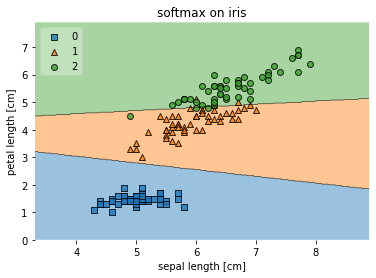

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values,clf,legend=2)

# adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('softmax on iris')